# 🏡 House Prices Prediction – Linear Regression with EDA

## 📋 Project Overview

Ce notebook présente un pipeline complet de régression pour prédire les prix des maisons à partir du jeu de données **Ames Housing**.
Nous appliquons des approches de modélisation en **forme fermée** ainsi qu’itératives afin d’obtenir un modèle fiable et correctement évalué.

---

## ✅ Étapes clés du flux de travail :
- 🔍 **Analyse exploratoire des données (EDA)** : comprendre la structure du jeu de données et repérer les principaux facteurs influençant le prix.
- 🧹 **Pré‑traitement :**
  - Gestion des valeurs manquantes
  - Détection & suppression des valeurs aberrantes,
  - Transformation logarithmique de la cible ('SalePrice').

- 🧠 **Feature Engineering**:
  - Création de variables telles que `TotalBathrooms`, `HouseAge` et `HasBasement`

- 📈 **Model Training**:
  - **LinearRegression (Normal Equation)** – pour la prédiction finale
  - **POLYNOMIAL REGRESSION (2°Equation)** – pour la comparaison finale
  - **SGDRegressor** with `StandardScaler` – pour visualiser l’évolution du RMSE au fil des itérations.

- 📊 **Evaluation**:
  - R² and RMSE on train/Test splits
  - RMSE plotted over epochs to analyze learning behavior

---

### 🛠️ Tools & Libraries Used:
- Python · Pandas · NumPy · Matplotlib · Seaborn  
- Scikit-learn (LinearRegression, SGDRegressor, StandardScaler, Pipelines)

---

> This notebook reflects a structured ML workflow with explainable modeling, proper evaluation, and clean documentation — aligned with best practices for applied regression modeling.


## 1. Importation des bibliothèques et chargement des données

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn import pipeline, preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Définir les paramètres des graphiques

In [3]:
# define plt settings (you don't have to do it every time, you can you the default values)
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import The Dataset

In [4]:
train_data_path = '/kaggle/input/house-pricing/data.csv'

train_df = pd.read_csv(train_data_path)


## 2. Revue initiale des données

In [5]:
print("train_df shape:", train_df.shape)


train_df shape: (2919, 81)


In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,179929.537306
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,76434.655734
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129900.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213125.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
train_df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,1153,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,879,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


## 3. Gestion des valeurs manquantes

In [10]:
def show_missing_values(df, show_top=20, plot=False, return_df=False):
    """
    Displays and optionally plots missing values in a DataFrame.

    Parameters:
    -----------
    df : pd.DataFrame
        The dataset to analyze.
    show_top : int
        Number of top missing columns to display.
    plot : bool
        If True, plots a horizontal bar chart of missing value percentages.
    return_df : bool
        If True, returns the missing values summary DataFrame.

    Returns:
    --------
    pd.DataFrame (optional)
        A summary of missing values (total and percent).
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected a pandas DataFrame.")

    total_missing = df.isnull().sum()
    percent_missing = (total_missing / len(df)) * 100

    missing_df = pd.concat([total_missing, percent_missing], axis=1)
    missing_df.columns = ['Total Missing', 'Percent Missing']
    missing_df = missing_df[missing_df['Total Missing'] > 0].sort_values('Total Missing', ascending=False)

    print("Missing Values (Top {}):\n".format(show_top))
    display(missing_df.head(show_top))

    if plot and not missing_df.empty:
        missing_df.head(show_top).sort_values("Percent Missing").plot(
            kind="barh", figsize=(10, 6), color="salmon", edgecolor="black"
        )
        plt.title("Top Missing Values")
        plt.xlabel("Percent Missing")
        plt.ylabel("Features")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    if return_df:
        return missing_df

def handle_missing_values(df, numeric_strategy='median', categorical_fill='None'):
    """
    Handles missing values in a DataFrame by:
    - Filling numeric columns with the median (or specified strategy)
    - Filling categorical columns with a default string (or specified value)

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame to clean.
    numeric_strategy : str or float
        Strategy for numeric columns: 'median' or a fixed value.
    categorical_fill : str
        Value to fill for missing categorical columns.

    Returns:
    --------
    pd.DataFrame
        A cleaned DataFrame with no missing values.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected a pandas DataFrame")

    df_cleaned = df.copy()

    # Fill numeric features
    numeric_features = df_cleaned.select_dtypes(include=[np.number]).columns
    for feature in numeric_features:
        if numeric_strategy == 'median':
            fill_value = df_cleaned[feature].median()
        else:
            fill_value = numeric_strategy
        df_cleaned[feature] = df_cleaned[feature].fillna(fill_value)

    # Fill categorical features
    categorical_features = df_cleaned.select_dtypes(include=['object', 'category']).columns
    for feature in categorical_features:
        df_cleaned[feature] = df_cleaned[feature].fillna(categorical_fill)

    print(f"Remaining missing values: {df_cleaned.isnull().sum().sum()}")
    return df_cleaned


In [11]:
print("Missing values in train_df:")
show_missing_values(train_df)
print("---------------------------------------------------------")

train_dataset_no_missing = handle_missing_values(train_df)



Missing values in train_df:
Missing Values (Top 20):



,Total Missing,Percent Missing
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageCond,159,5.447071


---------------------------------------------------------
Remaining missing values: 0


## 4. Target Variable Transformation

### Visualize the distribution of the target variable 'SalePrice'

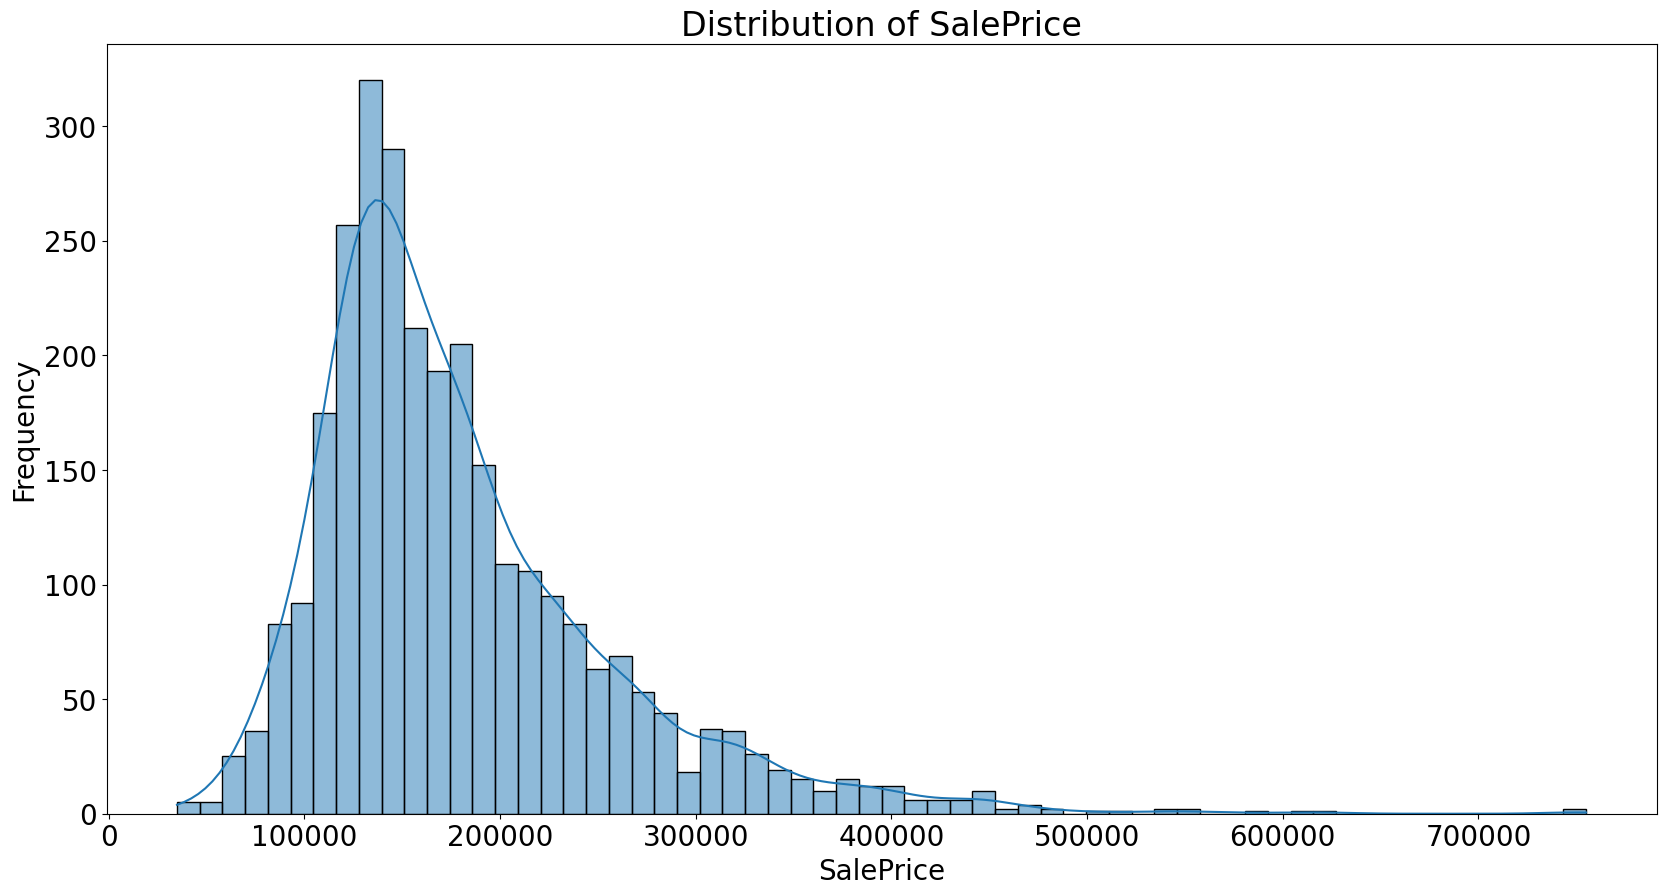

In [12]:
sns.histplot(train_dataset_no_missing['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### Diagnostic de l’histogramme :

- La distribution présente une asymétrie vers la droite (longue traîne). (right-skewed)

- La majorité des valeurs se situent entre 100 000 et 200 000 dollars.

- L’absence d’une courbe en cloche symétrique indique une non‑normalité.


Il semble qu'il y ait pas mal de Skewness et de Kurtosis dans la variable cible. Parlons-en un peu. 

<b>Skewness</b> 
* is the degree of distortion from the symmetrical bell curve or the normal curve. 
* So, a symmetrical distribution will have a skewness of "0". 
* There are two types of Skewness: <b>Positive and Negative.</b> 
* <b>Positive Skewness</b>(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter. 
* In <b>positive Skewness </b> the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price. 
* <b>Negative Skewness</b> means the tail on the left side of the distribution is longer and fatter.
* In <b>negative Skewness </b> the mean and median will be less than the mode. 
* Skewness differentiates in extreme values in one versus the other tail. 

Here is a picture to make more sense.  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)


<b>Kurtosis</b>
According to Wikipedia, 

*In probability theory and statistics, **Kurtosis** is the measure of the "tailedness" of the probability. distribution of a real-valued random variable.* So, In other words, **it is the measure of the extreme values(outliers) present in the distribution.** 

* There are three types of Kurtosis: <b>Mesokurtic, Leptokurtic, and Platykurtic</b>. 
* Mesokurtic is similar to the normal curve with the standard value of 3. This means that the extreme values of this distribution are similar to that of a normal distribution. 
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
* Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions. 

![image](https://i2.wp.com/mvpprograms.com/help/images/KurtosisPict.jpg?resize=375%2C234)


You can read more about this from [this](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) article. 

We can fix this by using different types of transformation(more on this later). However, before doing that, I want to find out the relationships among the target variable and other predictor variables. Let's find out.

### Transformation logarithmique de SalePrice

La variable `SalePrice` n'est pas normalement distribuée - elle est inclinée vers la droite, comme le montre l'histogramme. De nombreux modèles d'apprentissage automatique, en particulier la régression linéaire, supposent que la variable cible suit une distribution normale.

Pour y remédier, nous appliquons une **transformation logarithmique** à `SalePrice`. Cela permet de

- réduire l'asymétrie et rapprocher la distribution de la normale
- comprimer les grandes valeurs et réduire l'influence des valeurs aberrantes
- Améliorer les performances et les hypothèses des modèles de régression

Nous utilisons le logarithme naturel de (Prix de vente + 1) pour nous assurer que les valeurs nulles, s'il y en a, ne provoquent pas d'erreurs :


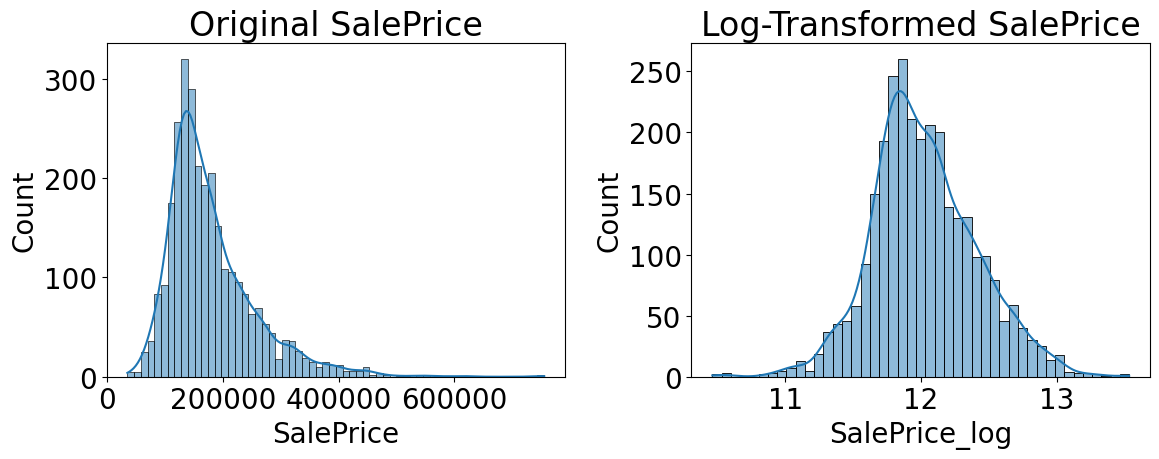

In [13]:
# Apply log(1 + x) to handle 0 values safely
train_dataset_no_missing['SalePrice_log'] = np.log1p(train_dataset_no_missing['SalePrice'])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_dataset_no_missing['SalePrice'], kde=True, ax=axs[0])
axs[0].set_title('Original SalePrice')

sns.histplot(train_dataset_no_missing['SalePrice_log'], kde=True, ax=axs[1])
axs[1].set_title('Log-Transformed SalePrice')

plt.tight_layout()
plt.show()

#### Effet de la transformation logarithmique sur la distribution de SalePrice

Le graphique de gauche montre la distribution originale de la variable `SalePrice`, qui est clairement **asymétrique**. Ce type d'asymétrie peut avoir un impact négatif sur les performances de nombreux modèles d'apprentissage automatique, en particulier ceux qui supposent une distribution normale de la variable cible, comme la régression linéaire.

Pour y remédier, nous avons appliqué une **transformation logarithmique** en utilisant `log1p` (logarithme de `PrixVente + 1`). Le résultat est illustré dans le graphique de droite.

Comme on peut le voir dans la distribution transformée :
- La forme est maintenant **plus symétrique et en forme de cloche**, ressemblant de près à une distribution normale.
- Les valeurs extrêmes (aberrantes) sont **compressées**, ce qui réduit leur influence.
- La transformation aide à satisfaire les hypothèses de normalité et d'homoscédasticité requises par plusieurs modèles statistiques et ML.

Cette transformation prépare la variable `SalePrice` pour une modélisation plus fiable et plus précise dans les étapes suivantes.

## 5. Feature Engineering (Ingénierie des caractéristiques)

Après avoir terminé l'analyse exploratoire initiale des données et les étapes de nettoyage, nous appliquons maintenant l'ingénierie des caractéristiques pour améliorer l'ensemble des données.

L'ingénierie des caractéristiques permet d'obtenir des informations spécifiques au domaine et d'améliorer les performances du modèle par les moyens suivants

- Créant des variables plus informatives
- Consolidant les caractéristiques redondantes
- Ajoutant des effets non linéaires pour les modèles linéaires.

Vous trouverez ci-dessous plusieurs nouvelles caractéristiques significatives dans le contexte des prix des logements :
- `TotalBathrooms` : Combine les salles de bain complètes et les demi-salles de bain en une seule mesure.
- `HasBasement` : Indique si la maison a un sous-sol (binaire).
- `HouseAge` : Âge de la maison depuis sa construction.
- `Remodled` : Indicateur binaire indiquant si la maison a été rénovée.

In [14]:
# Create new engineered features

# Total number of bathrooms (assuming HalfBath is in the dataset)
train_dataset_no_missing['TotalBathrooms'] = (
    train_dataset_no_missing['FullBath'] + 0.5 * train_dataset_no_missing.get('HalfBath', 0)
)

# HasBasement: binary feature
train_dataset_no_missing['HasBasement'] = (train_dataset_no_missing['TotalBsmtSF'] > 0).astype(int)

# HouseAge: how old the house is at the time of sale
train_dataset_no_missing['HouseAge'] = train_dataset_no_missing['YrSold'] - train_dataset_no_missing['YearBuilt']

# Remodeled: 1 if the house was remodeled, 0 if not
train_dataset_no_missing['Remodeled'] = (train_dataset_no_missing['YearBuilt'] != train_dataset_no_missing['YearRemodAdd']).astype(int)

# Check the new columns
train_dataset_no_missing[['TotalBathrooms', 'HasBasement', 'HouseAge', 'Remodeled']].head()


,TotalBathrooms,HasBasement,HouseAge,Remodeled
0,2.5,1,5,0
1,2.0,1,31,0
2,2.5,1,7,1
3,1.0,1,91,1
4,2.5,1,8,0


## 6. One-Hot Encoding pour les variables catégorielles

Pour générer une matrice de corrélation complète comprenant des caractéristiques catégorielles, nous devons d'abord les convertir en format numérique. Comme la corrélation ne peut être calculée qu'entre des variables numériques, nous appliquons un **encodage à chaud** aux colonnes catégorielles.

**One-hot encoding** crée de nouvelles colonnes binaires pour chaque catégorie d'une caractéristique catégorielle. Cela nous permet d'inclure ces caractéristiques dans l'analyse de corrélation.

Nous utilisons `pd.get_dummies()` pour appliquer l'encodage one-hot. Le paramètre `drop_first=True` est utilisé pour éviter la multicolinéarité en abandonnant la première catégorie dans chaque caractéristique.

In [15]:
# One-hot encode categorical variables
train_df_encoded = pd.get_dummies(train_dataset_no_missing, drop_first=True)

## 7. Correlation Heatmap

#### Concentration sur les caractéristiques les plus corrélées

Après l'application de l'encodage à un coup, le nombre de caractéristiques dans l'ensemble de données a augmenté de manière significative en raison de l'expansion des variables catégorielles. Bien que cela permette une représentation plus complète des données, il en résulte également une matrice de corrélation très large et dense qui est difficile à interpréter visuellement.

Pour rendre la matrice de corrélation plus lisible et mieux ciblée, nous limitons l'analyse aux **20 caractéristiques les plus fortement corrélées avec le `SalePrice`**. Cela nous aide à

- d'identifier les prédicteurs les plus importants pour la variable cible
- d'éviter l'encombrement visuel dû à des corrélations faibles ou non pertinentes
- d'obtenir des informations plus claires pour la sélection des caractéristiques et la modélisation.

Nous calculons les valeurs absolues de corrélation avec `SalePrice`, les trions par ordre décroissant et sélectionnons les caractéristiques les plus importantes (à l'exclusion de `SalePrice` lui-même). Ensuite, nous générons une carte thermique basée uniquement sur les caractéristiques sélectionnées.

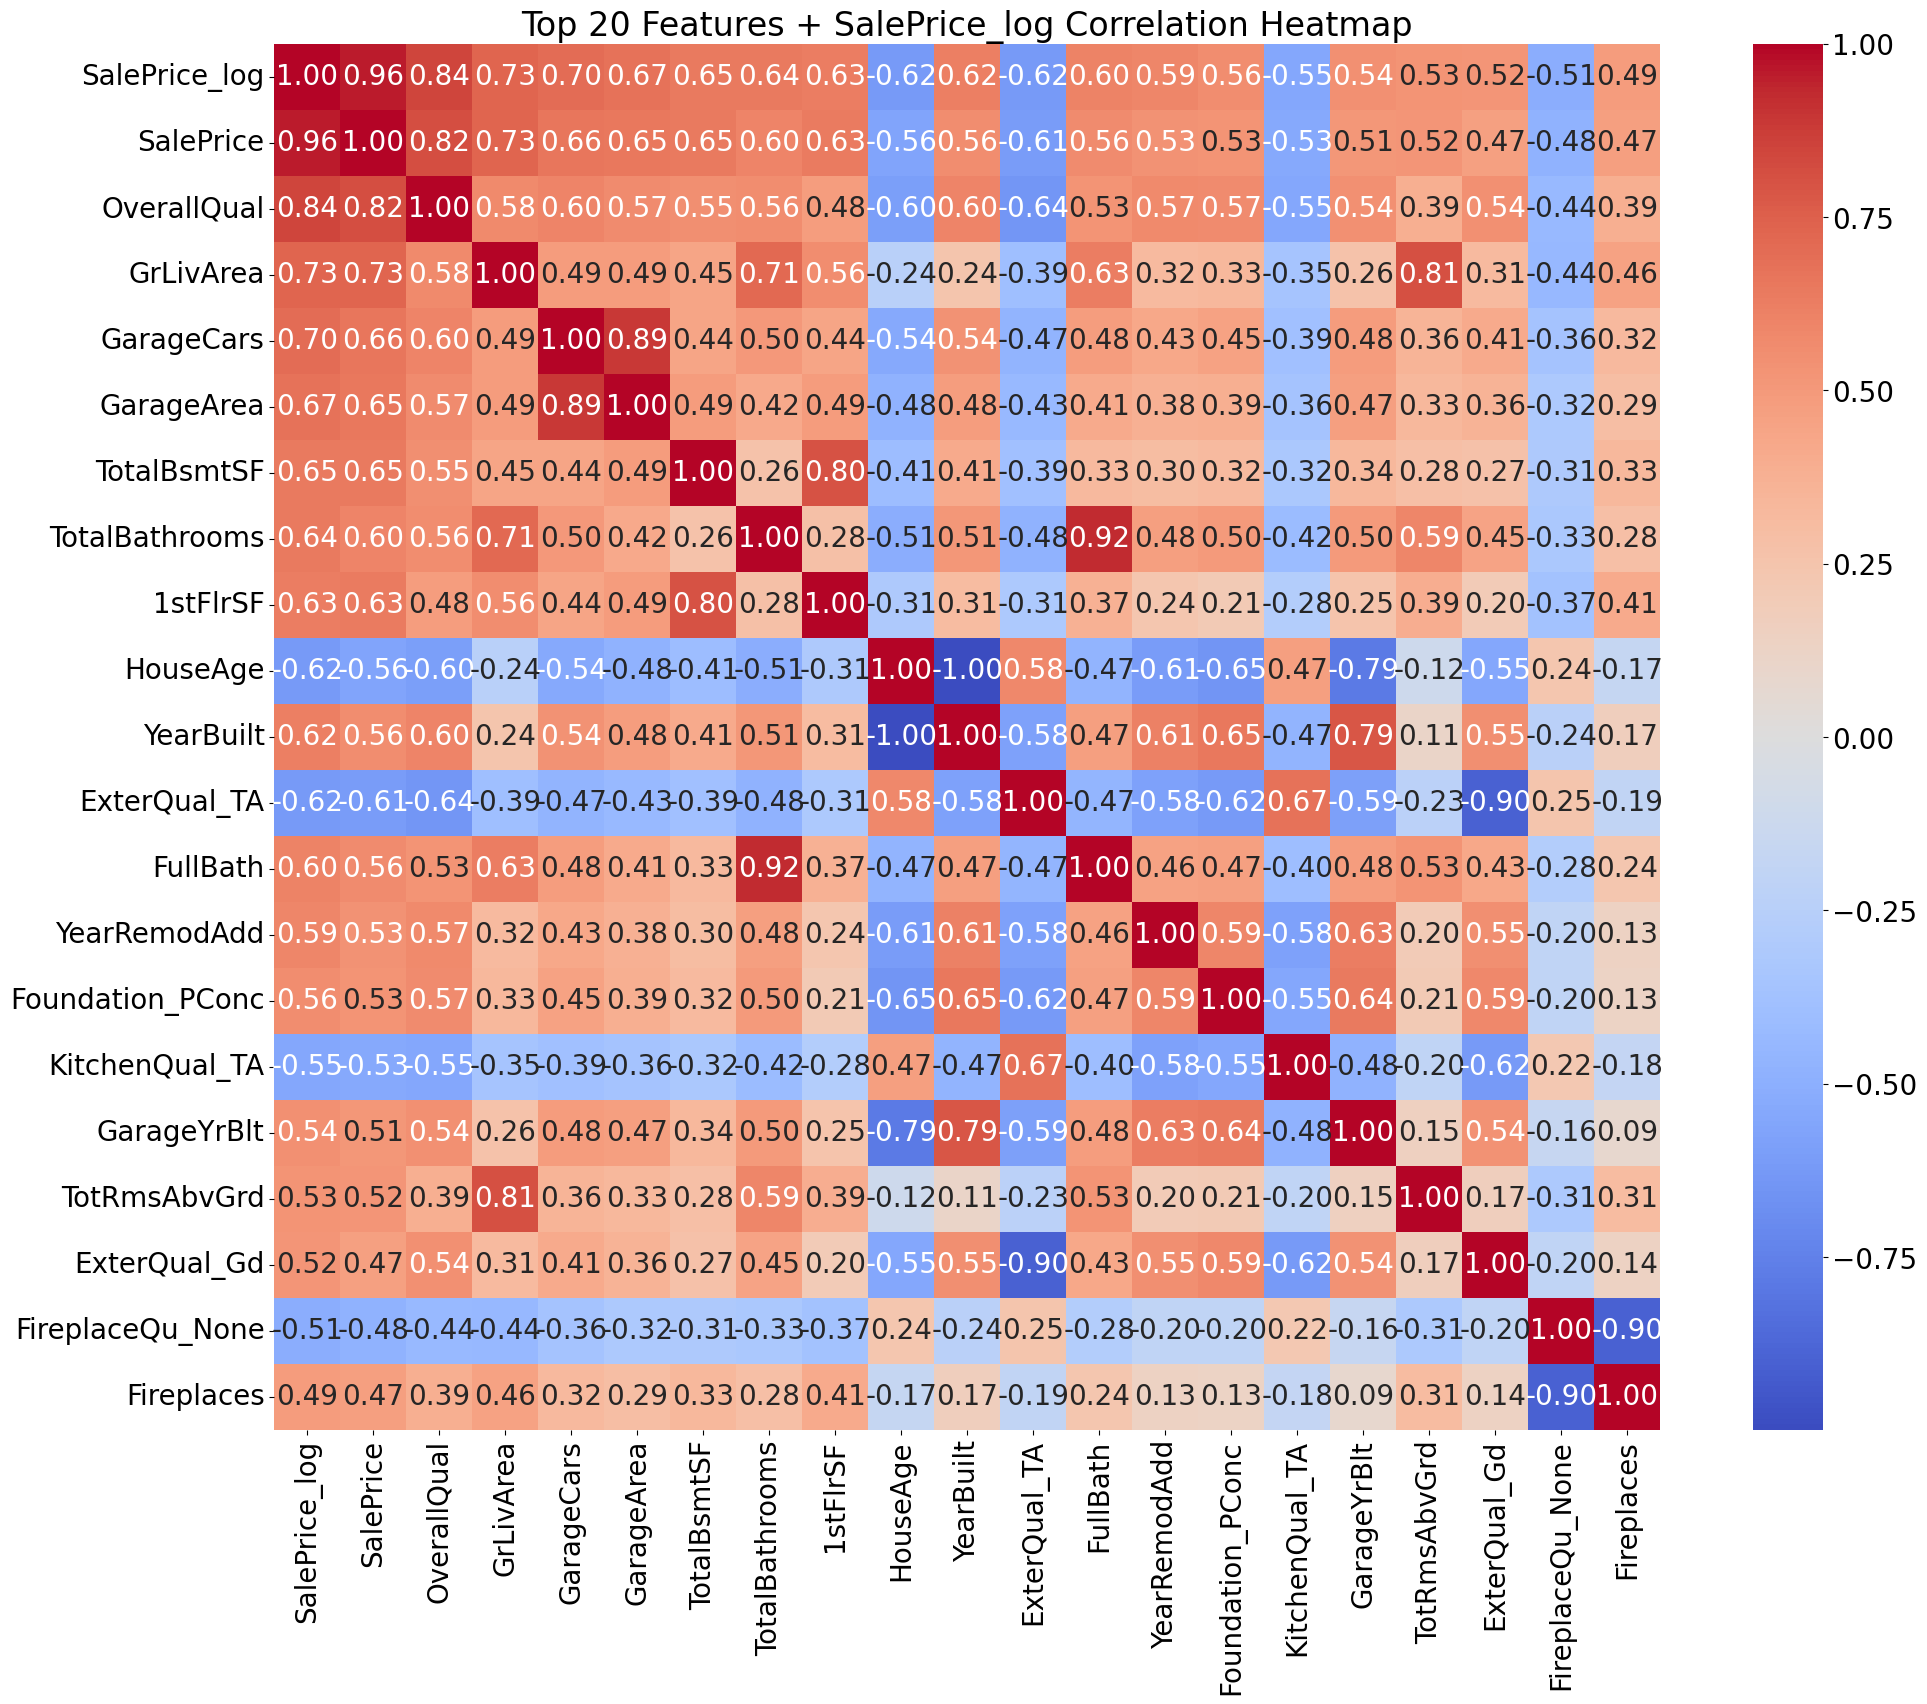

In [16]:
# Compute absolute correlation with SalePrice_log
corr_with_target = train_df_encoded.corr()['SalePrice_log'].abs().sort_values(ascending=False)

# Select top 20 features including SalePrice_log itself
top_features = corr_with_target[:21].index  # includes 'SalePrice_log'

# Compute correlation matrix for selected features
top_corr = train_df_encoded[top_features].corr()

# Plot heatmap
plt.figure(figsize=(24, 18))
sns.heatmap(top_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Top 20 Features + SalePrice_log Correlation Heatmap')
plt.show()

In [17]:

# 1) corrélation absolue de toutes les features avec SalePrice_log

target = 'SalePrice_log'
abs_corr = (
    train_df_encoded                # ton DataFrame après encodage
      .drop(columns=[target])       # on retire la cible
      .corrwith(train_df_encoded[target])  # corrélation 1‑to‑1
      .abs()                        # valeur absolue
      .sort_values(ascending=False) # décroissant
)

# 2) top 10
top10 = abs_corr.head(10)

# 3) affichage texte
print('Top‑20 corrélations absolues avec SalePrice_log :\n')
display(top20.to_frame('abs_corr'))


Top‑20 corrélations absolues avec SalePrice_log :



,abs_corr
SalePrice,0.957728
OverallQual,0.844170
GrLivArea,0.726816
GarageCars,0.697153
GarageArea,0.673141
TotalBsmtSF,0.645690
TotalBathrooms,0.641148
1stFlrSF,0.625896
HouseAge,0.617783
YearBuilt,0.617739


### Feature Selection basée sur la corrélation

Pour sélectionner les caractéristiques les plus pertinentes pour la modélisation, nous avons examiné la corrélation entre chaque caractéristique et la variable cible log-transformée `SalePrice_log`. Les caractéristiques présentant une corrélation absolue élevée (généralement supérieure à 0,5) sont considérées comme des prédicteurs puissants.

Le tableau suivant résume les caractéristiques les plus corrélées avec `SalePrice_log`, comme le montre la carte thermique :


| Feature           | Correlation | Description                                          |
|------------------|-------------|------------------------------------------------------|
| OverallQual       | 0.84        | Overall material and finish quality                 |1
| GrLivArea         | 0.73        | Above-ground living area (in square feet)           |2
| GarageCars        | 0.70        | Number of cars that can fit in garage               |3
| GarageArea        | 0.67        | Garage size (in square feet)                        |4
| TotalBsmtSF       | 0.65        | Total basement area                                 |5
| TotalBathrooms    | 0.65        | Engineered feature: full + 0.5 * half bathrooms     |6
| 1stFlrSF          | 0.63        | First floor area                                    |7
| HouseAge          | -0.62       | Engineered feature: age of the house                |8
| YearBuilt         | 0.62        | Year the house was originally built                 |9
| ExterQual_TA      | -0.61       | One-hot encoded: typical/average exterior quality   |10
| FullBath          | 0.60        | Number of full bathrooms                            |11
| YearRemodAdd      | 0.58        | Year of last remodel                                |12
| Foundation_PConc  | -0.55       | One-hot encoded: foundation made of poured concrete |13
| KitchenQual_TA    | -0.54       | One-hot encoded: typical/average kitchen quality    |14
| TotRmsAbvGrd      | 0.52        | Total rooms above ground (excluding bathrooms)      |15


---

### Traitement de la multicolinéarité

Certaines caractéristiques sont fortement corrélées entre elles, ce qui peut introduire une multicolinéarité dans les modèles linéaires. C'est le cas par exemple :

- `GarageCars` and `GarageArea`: r = **0.88**
- `TotalBsmtSF` and `1stFlrSF`: r = **0.82**
- `YearBuilt` and `GarageYrBlt`: r ≈ **0.78**

Pour réduire la redondance :

- ✅ **Keep `GarageCars`**, drop `GarageArea` — simpler and more interpretable
- ✅ **Keep `TotalBsmtSF`**, drop `1stFlrSF` — complements `GrLivArea` better

---

### ✅ Final Selected Features pour la modélisation

Sur la base de l'intensité de la corrélation et de la réduction de la multicolinéarité, nous sélectionnons les caractéristiques suivantes :


In [18]:
selected_features = [
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotalBathrooms',
    'TotalBsmtSF',
    'FullBath',
    'ExterQual_TA',
    'HouseAge',
    'Foundation_PConc'
]

## 8. Scatter & Box Plots avec détection des valeurs aberrantes


#### Scatter Plots of Selected Features vs SalePrice_log

Pour comprendre comment les caractéristiques numériques sélectionnées sont liées à la variable cible (`SalePrice_log`), nous visualisons chacune d'entre elles à l'aide d'un diagramme de dispersion. Ces diagrammes permettent de mettre en évidence

- les relations linéaires
- Les valeurs aberrantes ou les modèles inhabituels
- L'étalement de la distribution et la formation de grappes

Note : La caractéristique binaire `ExterQual_TA` n'est pas incluse dans les diagrammes de dispersion car elle est catégorielle. A la place, nous utilisons un diagramme en boîte.


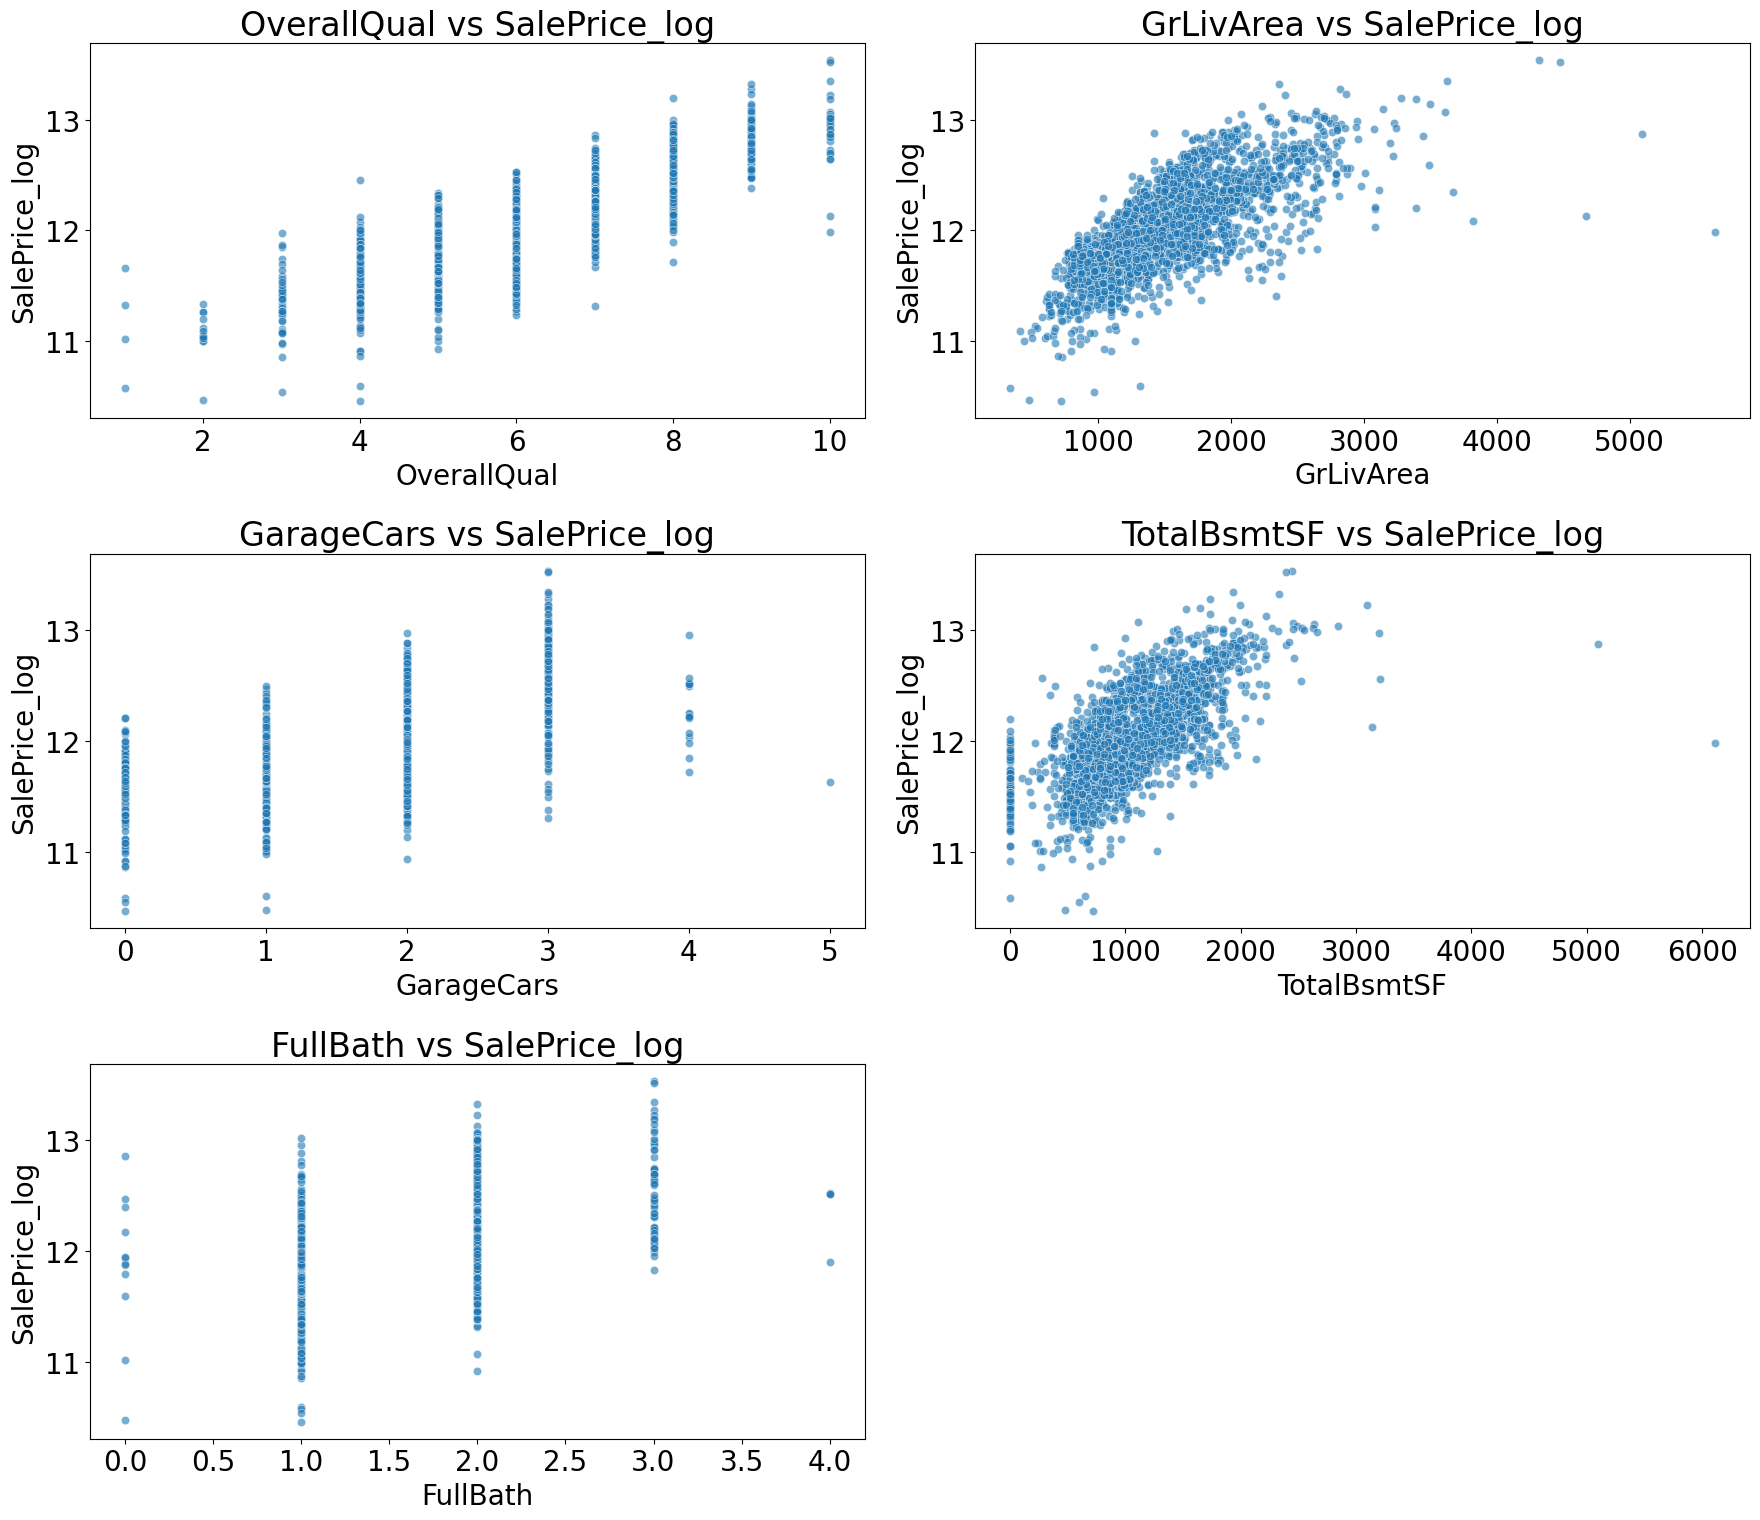

In [19]:
# Scatter plots for numeric features only
plt.figure(figsize=(18, 20))
i = 1
for feature in selected_features:
    if feature in train_df.columns and pd.api.types.is_numeric_dtype(train_df[feature]):
        plt.subplot(4, 2, i)
        sns.scatterplot(data=train_df_encoded, x=feature, y='SalePrice_log', alpha=0.6)
        plt.title(f'{feature} vs SalePrice_log')
        plt.xlabel(feature)
        plt.ylabel('SalePrice_log')
        i += 1  # Only increment subplot index for valid features
plt.tight_layout()
plt.show()

##### Interpretation of Scatter Plots

Les diagrammes de dispersion suivants visualisent la relation entre les caractéristiques numériques sélectionnées et la variable cible `SalePrice_log`. Ces diagrammes nous aident à évaluer la force des caractéristiques, la linéarité, les valeurs aberrantes et la fiabilité en tant que prédicteurs dans un modèle de régression.

---

##### 🔹 OverallQual
- Relation **positive forte et par paliers** avec `SalePrice_log`.
- Une qualité supérieure mène clairement à des prix plus élevés.
- Variable ordinale propre avec peu de bruit — très fiable.

---

##### 🔹 GrLivArea (Surface habitable hors sous-sol)
- Montre une forte **tendance linéaire positive**.
- Comme attendu, les plus grandes surfaces correspondent à des prix de vente plus élevés.
- Quelques valeurs très élevées dévient légèrement — possibles légers outliers.

---

##### 🔹 GarageCars
- Tendance **positive par paliers**, discrète et claire.
- Le prix augmente régulièrement avec la capacité du garage (jusqu’à environ 3–4 voitures).
- Excellent candidat pour les modèles arborescents, mais peut aussi être traité comme variable catégorielle.

---

##### 🔹 TotalBathrooms (Variable construite)
- Tendance générale à la hausse avec l’augmentation du nombre de salles de bains.
- Légère dispersion à chaque niveau, mais la relation reste **visiblement positive**.
- Combine efficacement `FullBath` et `HalfBath` en une variable forte.

---

##### 🔹 TotalBsmtSF
- Motif **linéaire positif fort**.
- Certaines maisons à prix bas avec de grands sous-sols indiquent de légers outliers ou cas particuliers.
- Les valeurs nulles indiquent clairement les maisons sans sous-sol — un ajout d’une variable `HasBasement` pourrait être utile.

---

##### 🔹 FullBath
- Tendance claire par paliers, bien que plus **dispersée** que `TotalBathrooms`.
- Appuie visuellement l'idée de combiner avec les demi-salles de bains dans la variable construite `TotalBathrooms`.

---

##### 🔹 HouseAge (Variable construite)
- Affiche une **relation négative** : les maisons plus anciennes ont tendance à avoir des prix légèrement plus bas.
- Une certaine dispersion chez les maisons anciennes, mais la tendance reste visible.
- Apporte un contexte historique précieux en complément des attributs physiques.

---

### 📌 Résumé

La plupart des variables montrent une **relation claire et interprétable** avec la variable cible.
- Des variables comme `OverallQual`, `GrLivArea`, `TotalBsmtSF` et `GarageCars` présentent un fort pouvoir prédictif.
- Les variables construites comme `TotalBathrooms` et `HouseAge` apportent de l’interprétabilité et de la structure.
- Quelques légers outliers sont visibles mais ne masquent pas les tendances — les gérer améliore les performances du modèle.

Toutes ces variables sont d’excellents candidats pour un modèle de régression prédictive.


#### Suppression des valeurs aberrantes

Avant de visualiser les graphiques de dispersion finaux, nous avons appliqué une **suppression des valeurs aberrantes** en utilisant la méthode de l’**écart interquartile (IQR)** afin de nettoyer les principales variables numériques. Cela permet d’éviter que les relations entre les variables et la variable cible `SalePrice_log` ne soient faussées par des valeurs extrêmes.

Nous nous sommes concentrés sur les variables présentant une forte valeur prédictive et un potentiel d’outliers :
- `GrLivArea` (surface habitable hors sous-sol)
- `TotalBsmtSF` (surface du sous-sol)
- `SalePrice_log` (variable cible)

Les outliers ont été définis comme les valeurs situées en dehors de l’intervalle :
- **[Q1 − 1,5 × IQR, Q3 + 1,5 × IQR]**, où Q1 et Q3 représentent les 25e et 75e percentiles

---

La suppression des valeurs aberrantes permet de :
- Améliorer la lisibilité des visualisations
- Éviter des coefficients de régression biaisés
- Réduire la variance et améliorer la généralisation pendant l’entraînement du modèle

Cette étape de prétraitement garantit que le modèle apprend à partir de la **distribution principale** des maisons typiques, sans être influencé par des cas rares ou extrêmes.


In [20]:
def remove_outliers_iqr(df, features):
    cleaned_df = df.copy()
    for feature in features:
        q1 = cleaned_df[feature].quantile(0.25)
        q3 = cleaned_df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Keep only values within the IQR range
        cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_bound) & (cleaned_df[feature] <= upper_bound)]
        print(f"{feature}: Removed {(len(df) - len(cleaned_df))} outliers")
        df = cleaned_df  # Update reference for chained filtering
    return cleaned_df

# Features to check
outlier_features = ['GrLivArea', 'TotalBsmtSF', 'SalePrice_log']

# Apply outlier removal
train_dataset_no_missing = remove_outliers_iqr(train_df_encoded, outlier_features)

# Update the encoded DataFrame accordingly
train_encoded_df_cleaned = train_df_encoded.loc[train_dataset_no_missing.index]

print("Original dataset shape:", train_df.shape)
print("Cleaned dataset shape:", train_dataset_no_missing.shape)


GrLivArea: Removed 74 outliers
TotalBsmtSF: Removed 120 outliers
SalePrice_log: Removed 27 outliers
Original dataset shape: (2919, 81)
Cleaned dataset shape: (2698, 274)


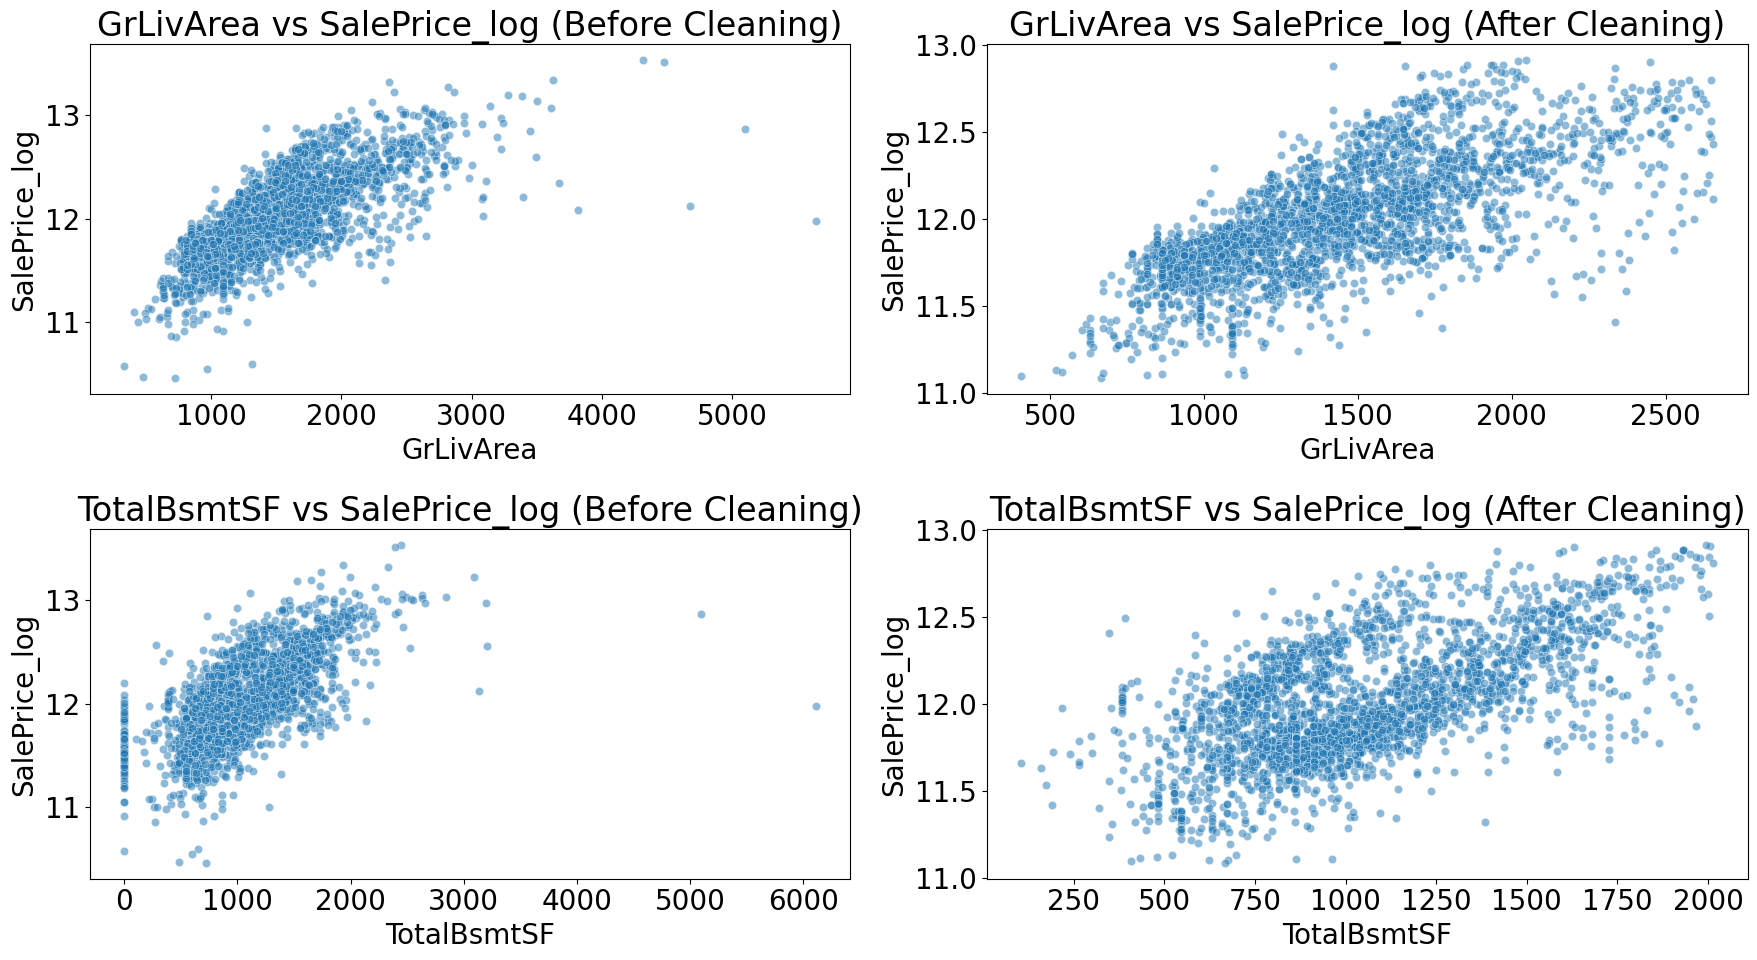

In [21]:
features_to_compare = ['GrLivArea', 'TotalBsmtSF']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

for i, feature in enumerate(features_to_compare):
    # Before cleaning
    sns.scatterplot(x=train_df_encoded[feature], y=train_df_encoded['SalePrice_log'], alpha=0.5, ax=axs[i][0])
    axs[i][0].set_title(f'{feature} vs SalePrice_log (Before Cleaning)')
    axs[i][0].set_xlabel(feature)
    axs[i][0].set_ylabel('SalePrice_log')

    # After cleaning
    sns.scatterplot(x=train_dataset_no_missing[feature], y=train_dataset_no_missing['SalePrice_log'], alpha=0.5, ax=axs[i][1])
    axs[i][1].set_title(f'{feature} vs SalePrice_log (After Cleaning)')
    axs[i][1].set_xlabel(feature)
    axs[i][1].set_ylabel('SalePrice_log')

plt.tight_layout()
plt.show()


##### Conclusion : Effet de la suppression des valeurs aberrantes

Les graphiques de dispersion ci-dessus comparent la relation entre les principales variables numériques (`GrLivArea` et `TotalBsmtSF`) et la variable cible (`SalePrice_log`) **avant et après** la suppression des valeurs aberrantes.

##### Principales observations :

- **Avant le nettoyage**, les données contenaient un petit nombre de valeurs extrêmes (par exemple, `GrLivArea > 4000`, `TotalBsmtSF > 4000`) qui ne suivaient pas la tendance linéaire générale.
- Ces valeurs aberrantes apparaissaient comme des points isolés, notamment dans le coin supérieur droit des graphiques, risquant de fausser les coefficients du modèle et de réduire sa capacité de généralisation.
- **Après le nettoyage**, les relations entre les variables et `SalePrice_log` sont devenues plus clairement linéaires, plus regroupées, et plus faciles à modéliser.
- Les données nettoyées montrent **moins de bruit et des motifs mieux définis**, ce qui est idéal pour la construction de modèles de régression.

##### Conclusion :

La suppression des valeurs aberrantes a amélioré la qualité des données et devrait permettre d’obtenir un modèle prédictif plus précis et plus stable. Le jeu de données nettoyé offre une représentation plus cohérente de la relation sous-jacente entre la surface habitable, la taille du sous-sol et les prix des maisons.



### Boxplots pour les variables catégorielles One-Hot Encoding

Pour les variables catégorielles qui ont été encodées en one-hot (c’est-à-dire converties en colonnes binaires), les graphiques de dispersion ne sont pas pertinents. À la place, nous utilisons des **boxplots** pour visualiser comment la présence (1) ou l’absence (0) de chaque catégorie influence la distribution de `SalePrice_log`.

Les boxplots permettent de :
- Comparer la médiane et l’étendue de `SalePrice_log` pour différentes catégories
- Identifier quelles catégories sont associées à des prix de vente plus élevés ou plus bas
- Détecter des valeurs aberrantes dans chaque groupe de catégories

Ci-dessous, vous trouverez les boxplots pour les variables catégorielles encodées en one-hot sélectionnées.


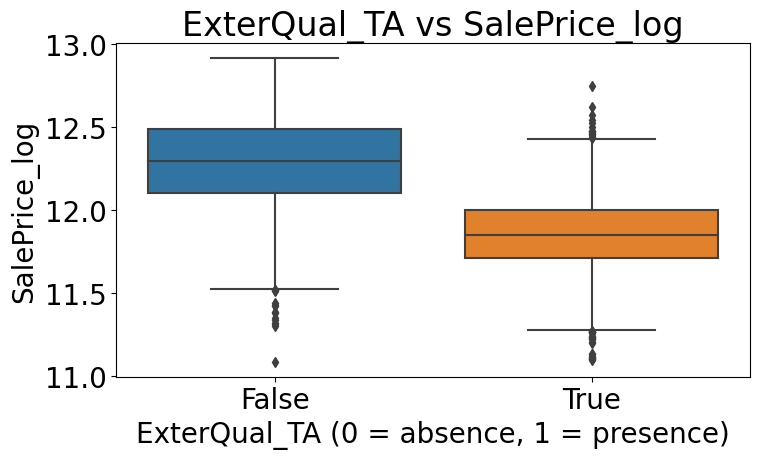

In [22]:
# List of one-hot encoded binary features we selected
encoded_features = ['ExterQual_TA']  # Add more if needed

# Plot boxplots
plt.figure(figsize=(8, 5 * len(encoded_features)))

for i, feature in enumerate(encoded_features, 1):
    plt.subplot(len(encoded_features), 1, i)
    sns.boxplot(x=train_dataset_no_missing[feature], y=train_dataset_no_missing['SalePrice_log'])
    plt.title(f'{feature} vs SalePrice_log')
    plt.xlabel(f'{feature} (0 = absence, 1 = presence)')
    plt.ylabel('SalePrice_log')

plt.tight_layout()
plt.show()

##### Analyse du Boxplot : `ExterQual_TA` (Variable encodée en one-hot)

`ExterQual_TA` est une variable binaire encodée en one-hot indiquant si une maison a une qualité extérieure **Typique/Moyenne**.

- `0` → La qualité extérieure **n’est pas** 'TA' (elle peut être Excellente, Bonne, Médiocre, etc.)
- `1` → La qualité extérieure **est** 'TA'

Le boxplot montre que :
- Les maisons avec `ExterQual_TA = 1` (qualité typique) ont généralement des **prix de vente plus faibles**
- Les maisons avec d'autres niveaux de qualité extérieure (`ExterQual_TA = 0`) tendent à avoir des **prix de vente plus élevés**

Cela confirme que la **qualité extérieure est une variable catégorielle significative**, et qu’un seul niveau encodé en one-hot comme `ExterQual_TA` fournit déjà des informations précieuses pour prédire le prix des maisons.


### Maintenant que nous avons préparé et nettoyé les données, nous procédons à l'apprentissage du modèle en utilisant les caractéristiques sélectionnées.

In [23]:
df = train_encoded_df_cleaned.copy()

In [24]:
df.shape

(2698, 274)

## 9. Model Training & Evaluation

Idéalement, si les hypothèses sont respectées, les résidus seront dispersés de manière aléatoire autour de la ligne centrale du zéro, sans motif apparent. Les résidus ressembleront à un nuage non structuré de points centrés autour de zéro. Cependant, notre graphique des résidus est tout sauf un nuage de points non structuré. Même s'il semble y avoir une relation linéaire entre la variable réponse et la variable prédicteur, le diagramme des résidus ressemble davantage à un entonnoir. 
 Voyons cela en détail. 

**Homoscédasticité (variance constante):** 
L'hypothèse d'homoscédasticité est cruciale pour les modèles de régression linéaire. L'homoscédasticité décrit une situation dans laquelle le terme d'erreur, la variance, le « bruit » ou la perturbation aléatoire dans la relation entre les variables indépendantes et la variable dépendante est identique pour toutes les valeurs de la variable indépendante. En d'autres termes, la variance de la variable réponse est constante lorsque la variable prédictive augmente. Si le « bruit » n'est pas le même pour toutes les valeurs d'une variable indépendante, comme le graphique résiduel ci-dessus, on parle d'hétéroscédasticité**. Comme vous pouvez le constater, il s'agit du contraire de l'homoscédasticité**.

<p><center><img src="https://www.dummies.com/wp-content/uploads/415147.image1.jpg" style="float:center"></img></p>

<p>Le graphique ci-dessus est un excellent exemple d'hétéroscédasticité.


Le graphique ci-dessus est un excellent exemple d'homoscédasticité. Comme vous pouvez le voir, la variance résiduelle est la même lorsque la valeur de la variable prédictive augmente. Une façon de corriger cette hétéroscédasticité est d'utiliser *une méthode de transformation* telle que la **transformation logarithmique** .


Cette section comprend
- l'apprentissage du modèle final sur l'ensemble des données d'apprentissage
- L'évaluation sur un échantillon de validation des données de formation
- Prédiction sur l'ensemble de test officiel

### 🔹 9.1 Final Model Training (All Data)

In [25]:
# 1) on met la cible dans y, le reste dans X
y = df["SalePrice_log"]
X = df.drop(columns=["SalePrice_log"])


### 9.2 Model Evaluation (Train/Test Split)

Avant de soumettre le modèle, il est recommandé d’évaluer ses performances sur un jeu de validation.

Nous avons divisé les données d'entraînement comme suit :
- 80 % pour l'entraînement
- 20 % pour le test

Nous avons ensuite évalué le modèle à l’aide des métriques suivantes :
- Score R²
- RMSE (Erreur quadratique moyenne) à la fois sur l’échelle logarithmique et l’échelle originale


In [26]:
from sklearn.model_selection import train_test_split

# fraction 80 % train / 20 % test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,        # 20 % pour le test
    random_state=42,       # pour pouvoir reproduire le tirage
    shuffle=True           # mélange préalable (recommandé)
)

print(f"Train : {X_train.shape},  Test : {X_test.shape}")


Train : (2158, 273),  Test : (540, 273)


In [32]:
# 2. Entraînement modèle linéaire sur le sous‑ensemble
# ---------------------------------------------------------------
lin_eval = LinearRegression()
lin_eval.fit(X_train, y_train)


LinearRegression()

On the two charts above, the left one is the average line, and the right one is the regression line. <font color="blue"><b>Blue</b></font> dots are observed data points and <font color="red"><b>red</b></font> lines are error distance from each observed data points to model-predicted line. As you can see, the regression line reduces much of the errors; therefore, performs much better than average line. 

Now, we need to introduce a couple of evaluation metrics that will help us compare and contrast models. One of them is mean squared error(MSE) which we used while comparing two models. Some of the other metrics are...

* RMSE (Root Mean Squared Error)
### $$ \operatorname{RMSE}= \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2} $$

Here
* $y_i$ = Each observed data point. 
* $\bar{y}$ = Mean of y value.
* $\hat{y_i}$ = Predicted data point for each $x_i$ depending on i. 


* MSE(Mean Squared Error)
### $$\operatorname{MSE}= \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2$$

* MAE (Mean Absolute Error)
### $$\operatorname{MAE} = \frac{\sum_{i=1}^n|{\bar{y} - y_i}|}{n}$$

* RSE (Relative Squared Error)
### $$\operatorname{RSE}= \frac{\sum_{i=1}^n(\hat{y_i} - y_i)^2}{\sum_{i=1}^n(\bar{y} - y_i)^2}$$

* RAE (Relative Absolute Error) 
### $$\operatorname{RAE}= \frac{\sum_{i=1}^n |\hat{y_i} - y_i|}{\sum_{i=1}^n |\bar{y} - y_i|}$$


> and 
* $R^2$ (Coefficient of the determination)

The evaluation metrics often named in such a way that I find it confusing to remember. So, this is a guide for me and everyone else who is reading it. There are many evaluation metrics. Let's name a few of them. 

It may seem confusing with multiple similar abbreviations, but once we focus on what they each do, things will become much more intuitive. For now, I am going to dive right into the $R^2$.

# $R^2$(The "Coefficient of determination"): 
> $R^2$ describes the proportion of variance of the dependent variable explained by the regression model. Let's write the equation for $R^2$. 

# $$ \operatorname{R^2} = \frac{SSR}{SST} $$

Here,

* SST(Sum of the Total Squared Error) is the total residual. It is also known as TSS(Total Sum of the Squared Error)
* SSR(Sum of the Squared Regression) is the residual explained by the regression line. SSR is also known as ESS(Explained Sum of the Squared Error)

and

* SSE(Sum of the Squared Error)/RSS(Residual Sum of the Squared Error)
Let's break these down. 

## SST/TSS:
SST is the sum of the squared distance from all points to average line ( $\bar{y}$ ). We call this the **total variation** in the Y's of the **Total Sum of the Squares(SST).** Let's see it in the function. 
### $$ \operatorname{SST} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

Here
* $y_i$ = Each observed data point. 
* $\bar{y}$ = Mean of y value.
* $\hat{y_i}$ = Predicted data point for each $x_i$ depending on i. 

A visualization would make things much more clear.
![](http://blog.hackerearth.com/wp-content/uploads/2016/12/anat.png)
 
In this visualization above, the light green line is the <font color="green"><b>average line</b></font> and the black dot is the observed value. So, SST describes the distance between the black dot and the <font color="green"><b>average line</b></font>.


## SSR/ESS:
SSR is the sum of the squared residual between each predicted value and the average line. In statistics language we say that, SSR is the squared residual explained by the regression line. In the visualization above SSR is the distance from <font color='green'><b>baseline model</b></font> to the <font color = 'blue'><b>regression line.</b></font> 
### $$ SSR = \sum_{i=1}^n \left(\hat{y_i} - \bar{y}\right)^2 $$

## SSE/RSS: 
RSS is calculated by squaring each residual of the data points and then adding them together. This residual is the difference between the predicted line and the observed value. In statistics language, we say, SSE is the squared residual that was not explained by the regression line, and this is the quantity least-square minimizes. In the chart above SSE is the distance of the actual data point from the <font color = 'blue'><b>regression line</b></font>. 

### $$ SSE = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

And the relation between all three of these metrics is
## $$SST = SSR + SSE$$


From the equation above and the $R^2$ equation from the top we can modify the $R^2$ equation as the following
# $$ R^2 = 1 - \frac{SSE}{SST} $$

## More on $R^2$: 
* $R^2$ is matric with a value between 0 and 1. 
* If the points are perfectly linear, then error sum of squares is 0, In that case, SSR = SST. Which means the variation in the Y's is completely explained by the regression line causing the value of $R^2$ to be close to 1. 
* In other extreme cases, when there is no relation between x and y, hence SSR = 0 and therefore SSE = SST, The regression line explains none of the variances in Y causing $R^2$ to be close to 0.
* $R^2$ measures the explanatory power of the model; The more of the variance in the dependent variable(Y) the model can explain, the more powerful it is.
* $R^2$ can be infinitely negative as well. Having a negative indicates that the predictive equation has a greater error than the baseline model.
* The value of $R^2$ increases as more feature gets added despite the effectiveness of those features in the model.
* This is a problem, since we may think that having a greater $R^2$ means a better model, even though the model didnot actually improved. In order to get around this we use Adjusted R-Squared($R^2_{adj}$)

**Adjusted R-Squared($R^2_{adj}$)**: 

$R^2_{adj}$ is similar to $R^2$. However, the value of$R^2_{adj}$ decreases if we use a feature that doesn't improve the model significantly. Let's write the equation for $R^2_{adj}$. 

## $$ {R^2_{adj}} = 1 - [\frac{(1 - R^2)(n-1)}{(n-k-1)}]$$

here, 
* n = # of datapoints. 
* k = # of feature used. 

As you can see from the equation, the increase of k(feature) in the denumerator penilizes the adjusted $R^2$ value if there is not a significant improvement of $R^2$ in the numerator.  

In [33]:
# 3. Prédiction + métriques en log‑espace
# ---------------------------------------------------------------
y_pred_lin = lin_eval.predict(X_test)

r2_log   = r2_score(y_test, y_pred_lin)
rmse_log = mean_squared_error(y_test, y_pred_lin, squared=False)


print("===  LOG‑SCALE  ===")

print(f"R² (log)  : {r2_log:.4f}")
print(f"RMSE (log): {rmse_log:.4f}")

===  LOG‑SCALE  ===
R² (log)  : 0.9786
RMSE (log): 0.0467


In [34]:
# ---------------------------------------------------------------
# 4. Métriques ramenées à l’échelle € réelle
# ---------------------------------------------------------------
y_valid_eur = np.expm1(y_test)        # inverse de log1p
y_pred_eur  = np.expm1(y_pred_lin)

print("\n===  ORIGINAL SCALE (€)  ===")
rmse_eur = mean_squared_error(y_valid_eur, y_pred_eur, squared=False)
print(f"RMSE (€)  : {rmse_eur:,.0f}")


===  ORIGINAL SCALE (€)  ===
RMSE (€)  : 8,181


In [35]:
# --------------------------------------------------------
# 1. Pipeline : (PolynomialFeatures degree=d) → LinearRegression
# --------------------------------------------------------
degree = 2          # ↖︎ change ici si tu veux d=3,4…
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linreg", LinearRegression())
])

# --------------------------------------------------------
# 2. Entraînement dans l’espace log
# --------------------------------------------------------
poly_model.fit(X_train, y_train)

# --------------------------------------------------------
# 3. Prédiction + métriques (log‑espace)
# --------------------------------------------------------
y_pred_pol = poly_model.predict(X_test)

r2_log   = r2_score(y_test, y_pred_pol)
rmse_log = mean_squared_error(y_test, y_pred_pol, squared=False)

print("=== POLYNOMIAL REGRESSION ===")
print(f"Degree       : {degree}")
print(f"R² (log)     : {r2_log:.4f}")
print(f"RMSE (log)   : {rmse_log:.4f}")

# --------------------------------------------------------
# 4. Retour à l’échelle réelle (€) et métriques interprétables
# --------------------------------------------------------
y_test_eur = np.expm1(y_test)
y_pred_eur = np.expm1(y_pred_pol)

rmse_eur = mean_squared_error(y_test_eur, y_pred_eur, squared=False)

print("\n=== ORIGINAL SCALE (€) ===")
print(f"RMSE (€)     : {rmse_eur:,.0f}")


=== POLYNOMIAL REGRESSION ===
Degree       : 2
R² (log)     : 0.9712
RMSE (log)   : 0.0541

=== ORIGINAL SCALE (€) ===
RMSE (€)     : 9,849


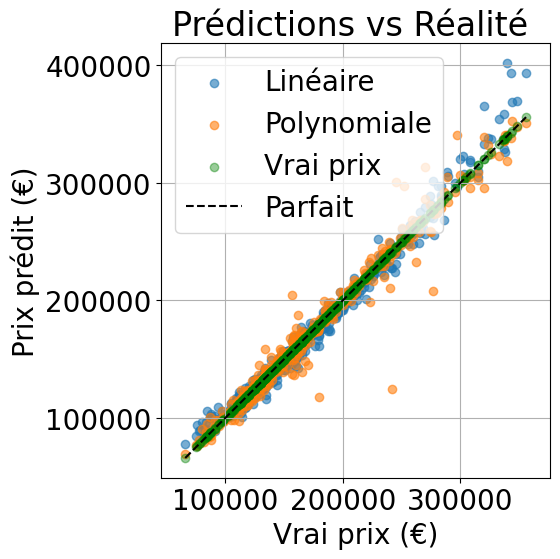

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))  # Taille du graphique en pouces (largeur x hauteur)

# 1. Prédictions linéaires (bleu par défaut)
plt.scatter(y_test_eur, y_pred_lin_eur, label="Linéaire", alpha=0.6)

# 2. Prédictions polynomiales (orange par défaut)
plt.scatter(y_test_eur, y_pred_poly_eur, label="Polynomiale", alpha=0.6)

# 3. Points parfaits : prédiction == réalité (en vert)
plt.scatter(y_test_eur, y_test_eur, label="Vrai prix", color="green", alpha=0.4)

# 4. Diagonale de référence (ligne pointillée noire)
plt.plot([min(y_test_eur), max(y_test_eur)],
         [min(y_test_eur), max(y_test_eur)],
         color="black", linestyle="--", label="Parfait")

# 5. Axes et titres
plt.xlabel("Vrai prix (€)")                   # Nom de l'axe X
plt.ylabel("Prix prédit (€)")                 # Nom de l'axe Y
plt.title("Prédictions vs Réalité ")# Titre du graphique

# 6. Légende et mise en forme
plt.legend()              # Affiche la légende des couleurs
plt.grid(True)            # Active la grille pour lire plus facilement
plt.axis("equal")         # Force X et Y à être à la même échelle
plt.tight_layout()        # Ajuste automatiquement la disposition pour éviter que ça déborde
plt.show()                # Affiche le graphique


### 9.3 Entraînement de SGDRegressor à l’aide d’un Pipeline

Pour créer un flux de travail propre et standardisé pour l’entraînement du modèle, nous utilisons un `Pipeline` qui combine :

- **StandardScaler()** : pour normaliser les variables avec une moyenne nulle et une variance unitaire
- **SGDRegressor()** : un modèle linéaire itératif qui s’optimise par descente de gradient

Cette approche améliore la stabilité de l’entraînement et respecte les bonnes pratiques pour les modèles nécessitant des données mises à l’échelle.

Bien que les prédictions finales aient été réalisées avec l’Équation Normale (`LinearRegression`), ce pipeline basé sur SGD montre qu’il est possible d’atteindre des performances comparables avec une méthode itérative — particulièrement utile dans des contextes de données à grande échelle ou d’apprentissage en ligne.

Nous évaluons ci-dessous ses performances en utilisant le score R² et le RMSE, à la fois sur les jeux d’entraînement et de validation.


In [50]:
t_train = df['SalePrice_log']
X_train = df[selected_features]
X_test = X_test


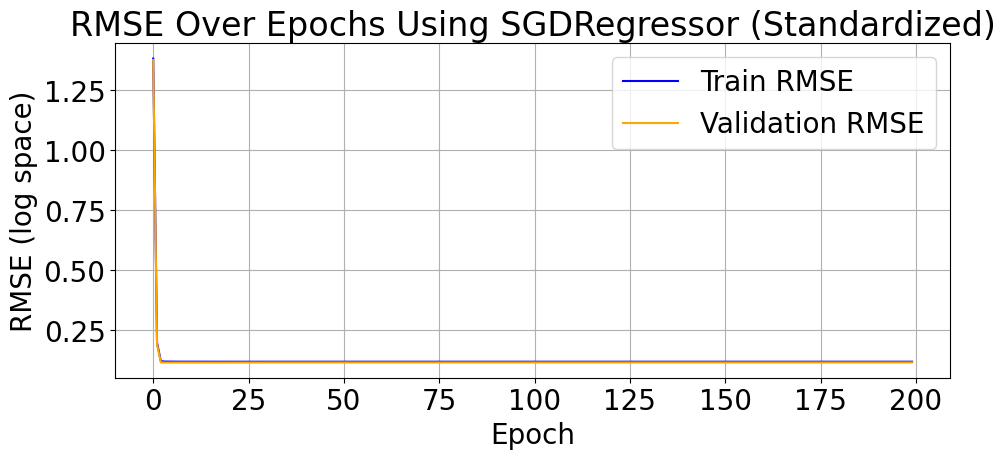

In [52]:
# Split data for validation
X_train_sub, X_valid, y_train_sub, y_valid = model_selection.train_test_split(X_train, t_train, test_size=0.2, random_state=42)

# Initialize scaler and model
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sub)
X_valid_scaled = scaler.transform(X_valid)

sgd_model = linear_model.SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.001,
    alpha=0.0001,
    penalty='l2',
    max_iter=1,
    warm_start=True,
    random_state=42
)

# Track RMSE over epochs
train_rmse = []
valid_rmse = []

for epoch in range(200):
    sgd_model.fit(X_train_scaled, y_train_sub)

    y_train_pred = sgd_model.predict(X_train_scaled)
    y_valid_pred = sgd_model.predict(X_valid_scaled)

    train_rmse.append(mean_squared_error(y_train_sub, y_train_pred,squared=False))
    valid_rmse.append(mean_squared_error(y_valid, y_valid_pred, squared=False))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_rmse, label='Train RMSE', color='blue')
plt.plot(valid_rmse, label='Validation RMSE', color='orange')
plt.xlabel('Epoch')
plt.ylabel('RMSE (log space)')
plt.title('RMSE Over Epochs Using SGDRegressor (Standardized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# Split data for evaluation
X_train_sub, X_valid, t_train_sub, t_valid = model_selection.train_test_split(X_train, t_train, test_size=0.2, random_state=42)

# Create pipeline: StandardScaler + SGDRegressor
sgd_pipeline = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.SGDRegressor(
        loss='squared_error',
        alpha=0.0001,        # Regularization strength (L2)
        learning_rate='invscaling',
        eta0=0.01,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    )
)

# Train the pipeline
sgd_pipeline.fit(X_train_sub, t_train_sub)

# Predict on train and validation sets
t_pred_train = sgd_pipeline.predict(X_train_sub)
t_pred_valid = sgd_pipeline.predict(X_valid)

# Evaluate
print("R² score on train:", metrics.r2_score(t_train_sub, t_pred_train))
print("R² score on validation:", metrics.r2_score(t_valid, t_pred_valid))
print()

print("RMSE on train:", mean_squared_error(t_train_sub, t_pred_train, squared=False))
print("RMSE on validation:", mean_squared_error(t_valid, t_pred_valid, squared=False))

R² score on train: 0.8744757540583865
R² score on validation: 0.8670403053934944

RMSE on train: 0.12025346431795653
RMSE on validation: 0.11637916564895742


## Resources & Credits. 
* [Types of Standard Deviation](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php)
* [What is Regression](https://www.youtube.com/watch?v=aq8VU5KLmkY)